In [41]:
library(fpp2)
library(gridExtra)
library(FitAR)

In [2]:
# 2. 교재 Forecasting: Principles and Practice, 섹션 8.11 (https://otexts.com/fppkr/arimaexercises.html)의 3 번 연습문제에 대해 답하라.
# 다음의 시계열에 대해, 적절한 박스-칵스(Box-Cox) 변환과 정상성을 나타내는 데이터를 얻기 위해서는 차분을 몇 번 구해야하는지 찾아봅시다.

# a.usnetelec
# b.usgdp
# c.mcopper
# d.enplanements
# e.visitors

In [3]:
# a.usnetelec
fit1 <- auto.arima(usnetelec)
fit1

Series: usnetelec 
ARIMA(2,1,2) with drift 

Coefficients:
          ar1      ar2     ma1     ma2    drift
      -1.3032  -0.4332  1.5284  0.8340  66.1585
s.e.   0.2122   0.2084  0.1417  0.1185   7.5595

sigma^2 estimated as 2262:  log likelihood=-283.34
AIC=578.67   AICc=580.46   BIC=590.61

In [4]:
fit1_1 <- Arima(usnetelec, order = c(0, 1, 0))
fit1_1

Series: usnetelec 
ARIMA(0,1,0) 

sigma^2 estimated as 6862:  log likelihood=-315.13
AIC=632.27   AICc=632.35   BIC=634.26

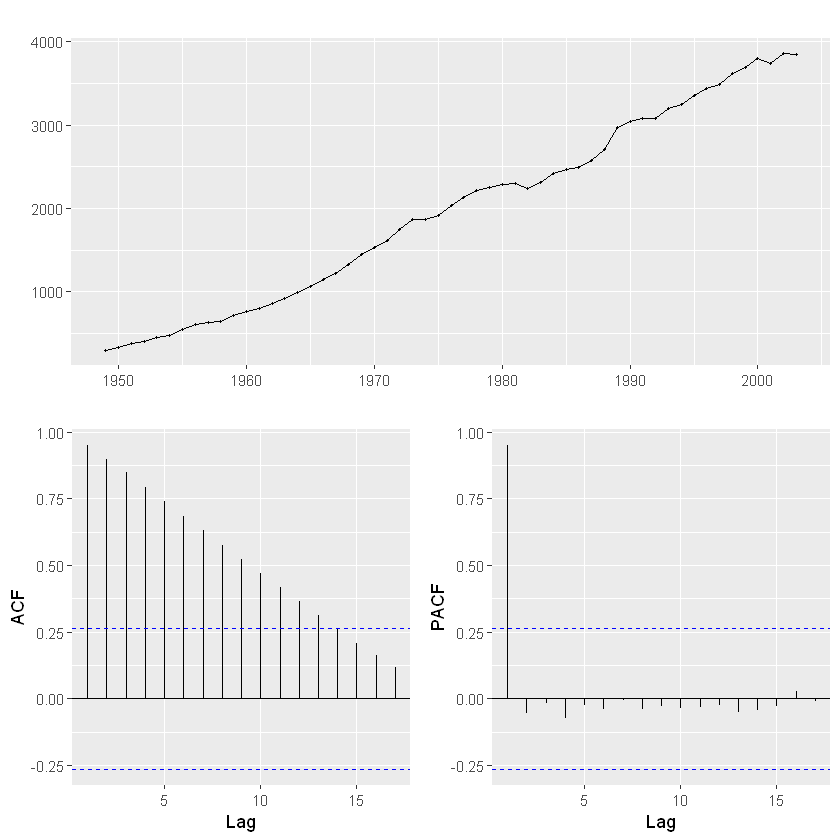

In [5]:
ggtsdisplay(usnetelec)

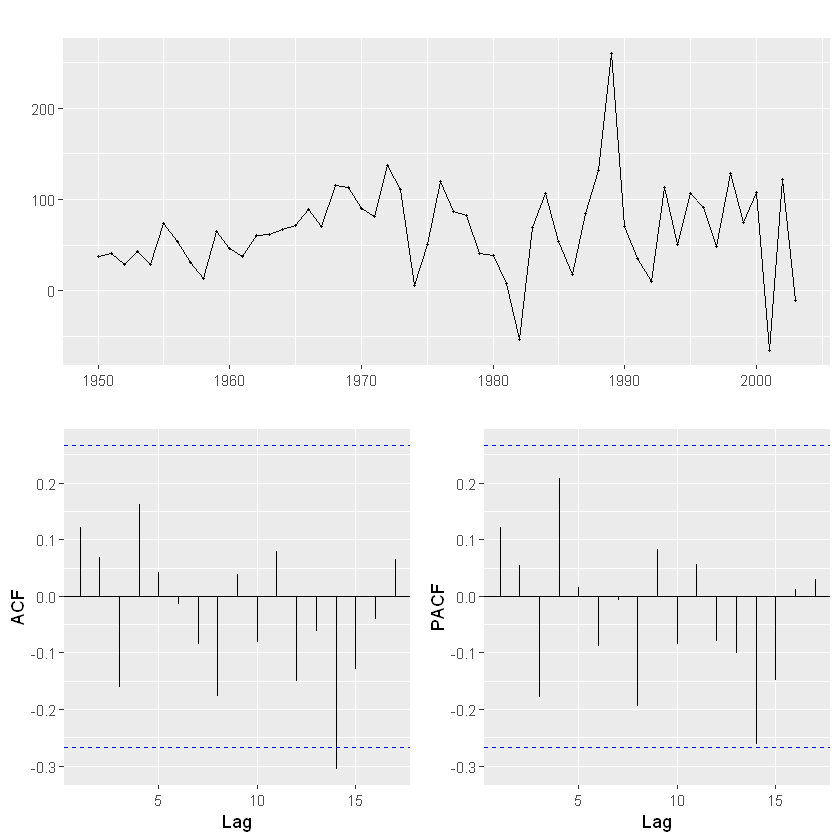

In [6]:
ggtsdisplay(diff(usnetelec))

 minimum data value <= 0 so -min+0.25 added to all values


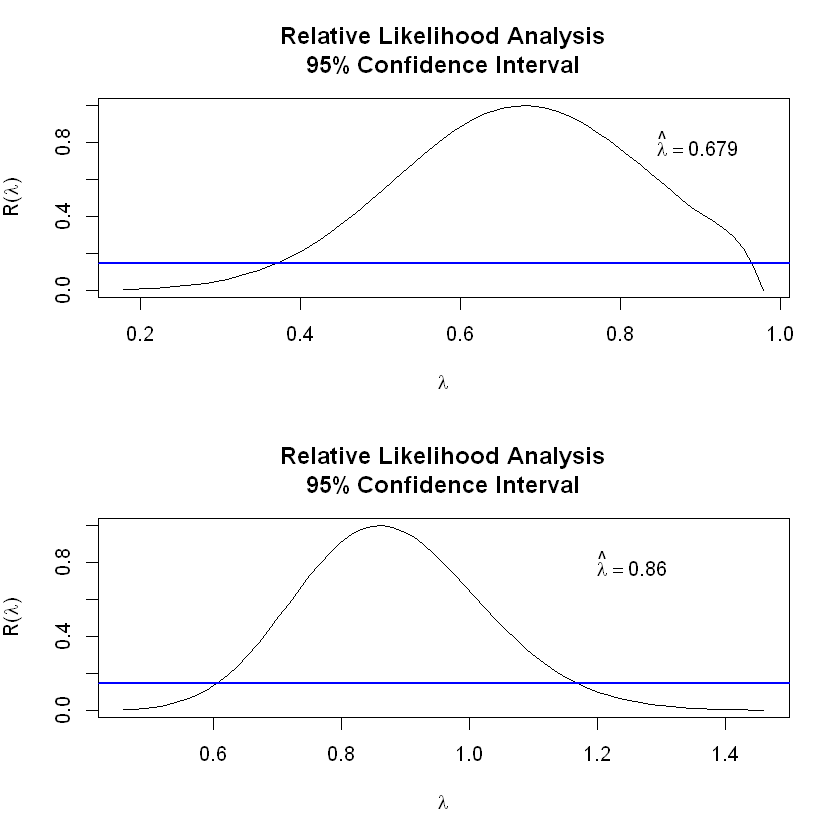

In [7]:
layout(mat=matrix(c(1,
                    2), nrow=2, byrow = TRUE))
BoxCox(usnetelec)
BoxCox(diff(usnetelec))

In [8]:
Box.test(fit1_1$residuals, type = "Ljung-Box")
Box.test(fit1$residuals, type = "Ljung-Box")


	Box-Ljung test

data:  fit1_1$residuals
X-squared = 1.0114, df = 1, p-value = 0.3146



	Box-Ljung test

data:  fit1$residuals
X-squared = 0.029371, df = 1, p-value = 0.8639



	Ljung-Box test

data:  Residuals from ARIMA(2,1,2) with drift
Q* = 2.7945, df = 5, p-value = 0.7316

Model df: 5.   Total lags used: 10



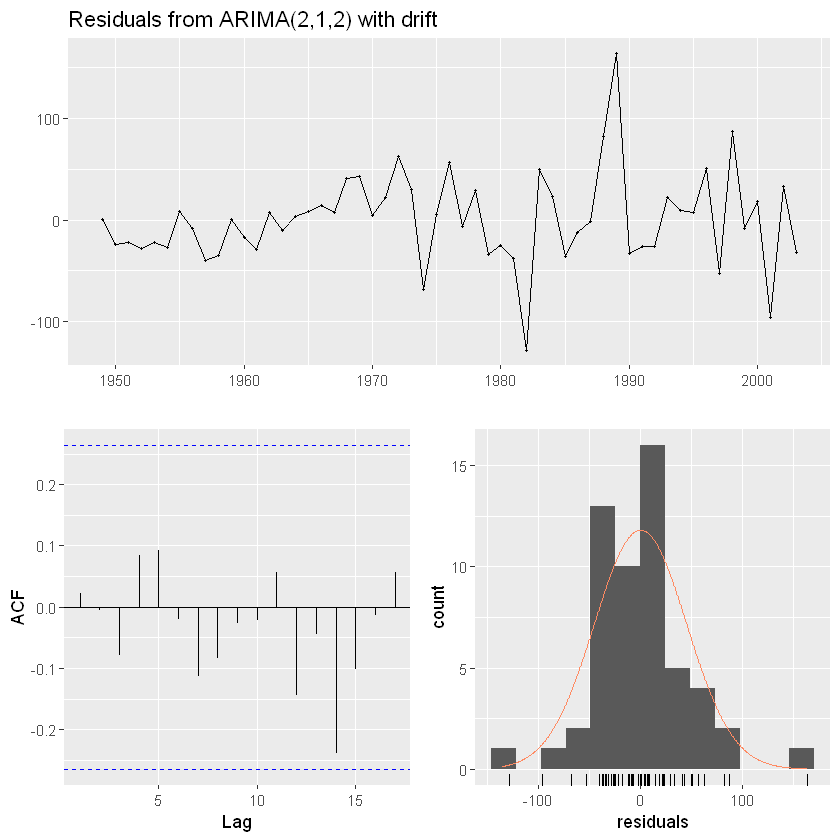

In [9]:
checkresiduals(fit1)

In [10]:
# b.usgdp
fit2 <- auto.arima(usgdp)
fit2

Series: usgdp 
ARIMA(2,2,2) 

Coefficients:
          ar1     ar2      ma1      ma2
      -0.1228  0.3106  -0.5835  -0.3669
s.e.   0.2869  0.0872   0.3004   0.2862

sigma^2 estimated as 1604:  log likelihood=-1199.57
AIC=2409.13   AICc=2409.39   BIC=2426.43

In [11]:
fit2_1 <- Arima(usgdp, order = c(0, 2, 0))
fit2_1

Series: usgdp 
ARIMA(0,2,0) 

sigma^2 estimated as 2442:  log likelihood=-1250.03
AIC=2502.06   AICc=2502.07   BIC=2505.52

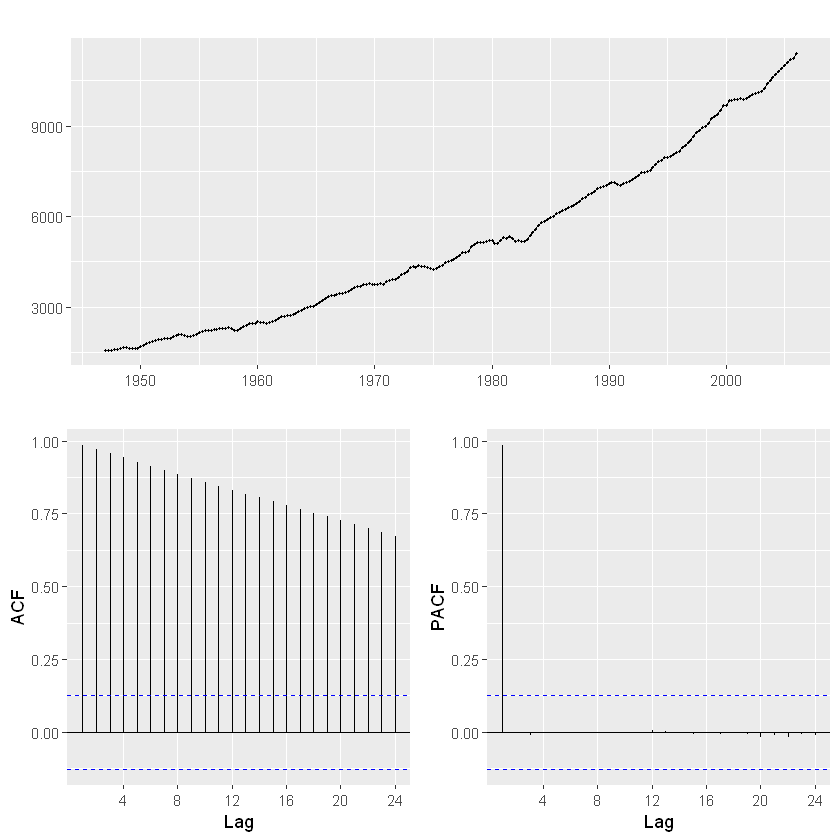

In [12]:
ggtsdisplay(usgdp)

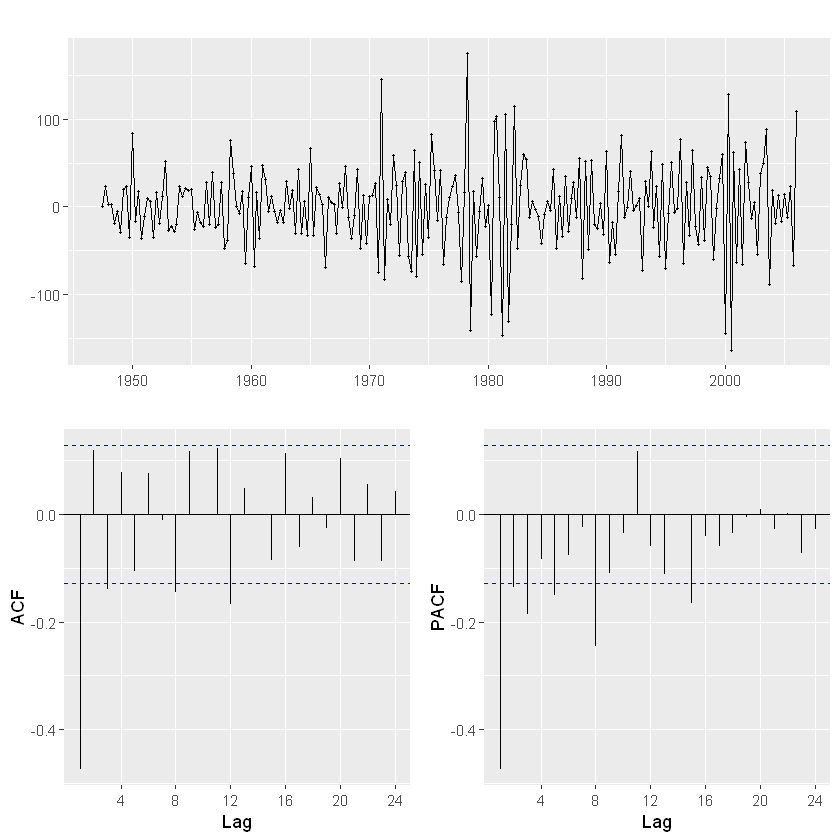

In [13]:
ggtsdisplay(diff(diff(usgdp)))

 minimum data value <= 0 so -min+0.25 added to all values


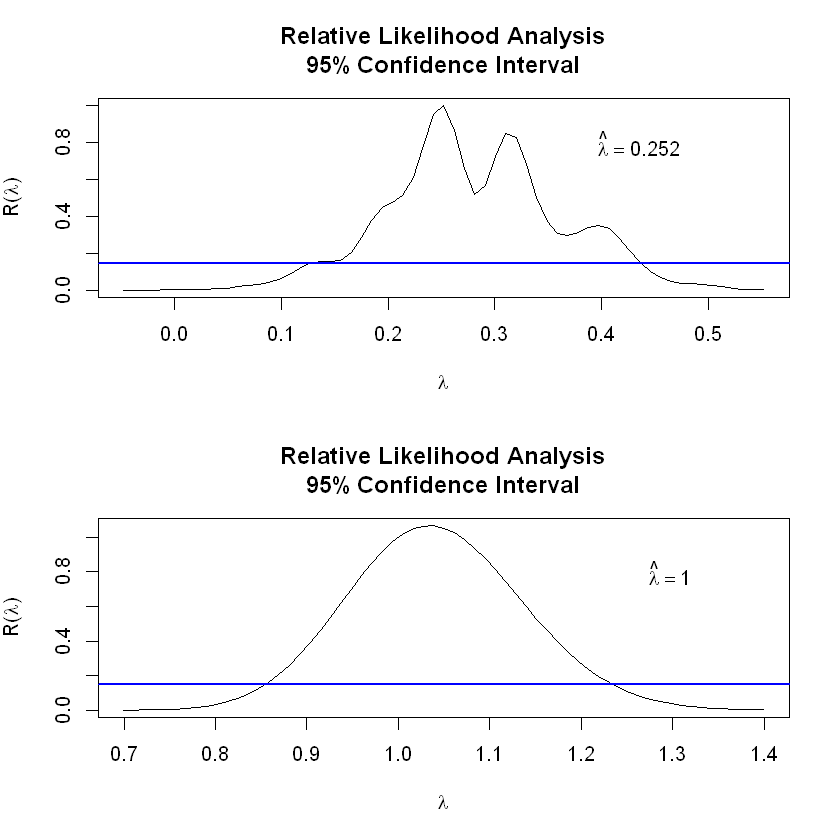

In [14]:
layout(mat=matrix(c(1,
                    2), byrow = TRUE))
BoxCox(usgdp)
BoxCox(diff(diff(usgdp)))

In [15]:
Box.test(fit2_1$residuals, type = "Ljung-Box")
Box.test(fit2$residuals, type = "Ljung-Box")


	Box-Ljung test

data:  fit2_1$residuals
X-squared = 53.742, df = 1, p-value = 2.287e-13



	Box-Ljung test

data:  fit2$residuals
X-squared = 0.07643, df = 1, p-value = 0.7822



	Ljung-Box test

data:  Residuals from ARIMA(2,2,2)
Q* = 8.6247, df = 4, p-value = 0.0712

Model df: 4.   Total lags used: 8



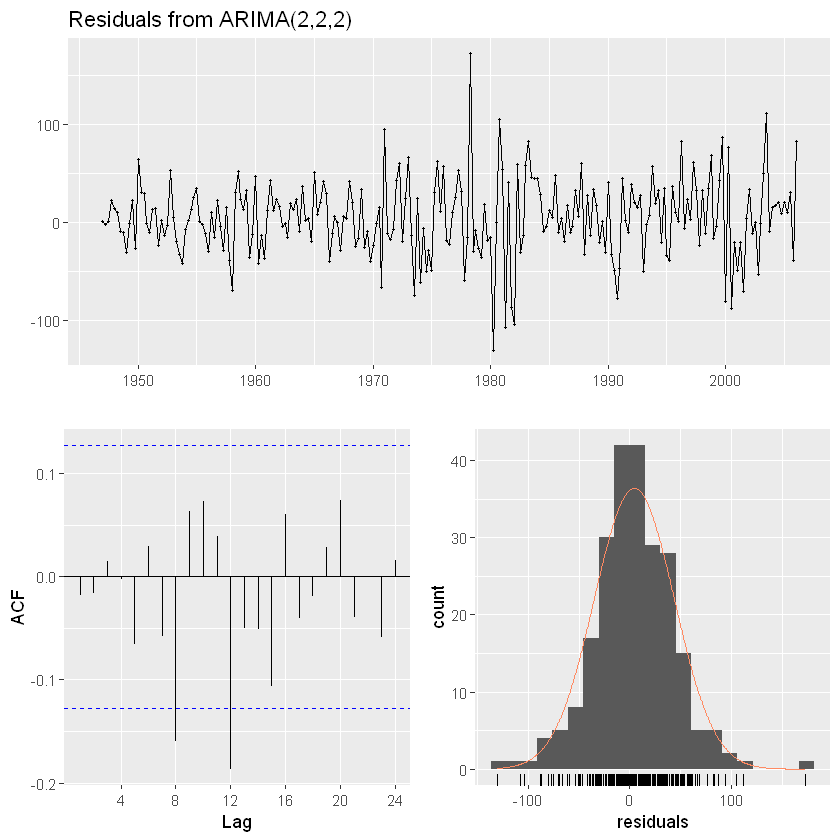

In [16]:
checkresiduals(fit2)

In [17]:
# c.mcopper
fit3 <- auto.arima(mcopper)
fit3

Series: mcopper 
ARIMA(0,1,1) 

Coefficients:
         ma1
      0.2900
s.e.  0.0419

sigma^2 estimated as 6026:  log likelihood=-3248.53
AIC=6501.07   AICc=6501.09   BIC=6509.73

In [18]:
fit3_1 <- Arima(mcopper, order = c(0, 1, 0))
fit3_1

Series: mcopper 
ARIMA(0,1,0) 

sigma^2 estimated as 6510:  log likelihood=-3270.73
AIC=6543.46   AICc=6543.47   BIC=6547.79

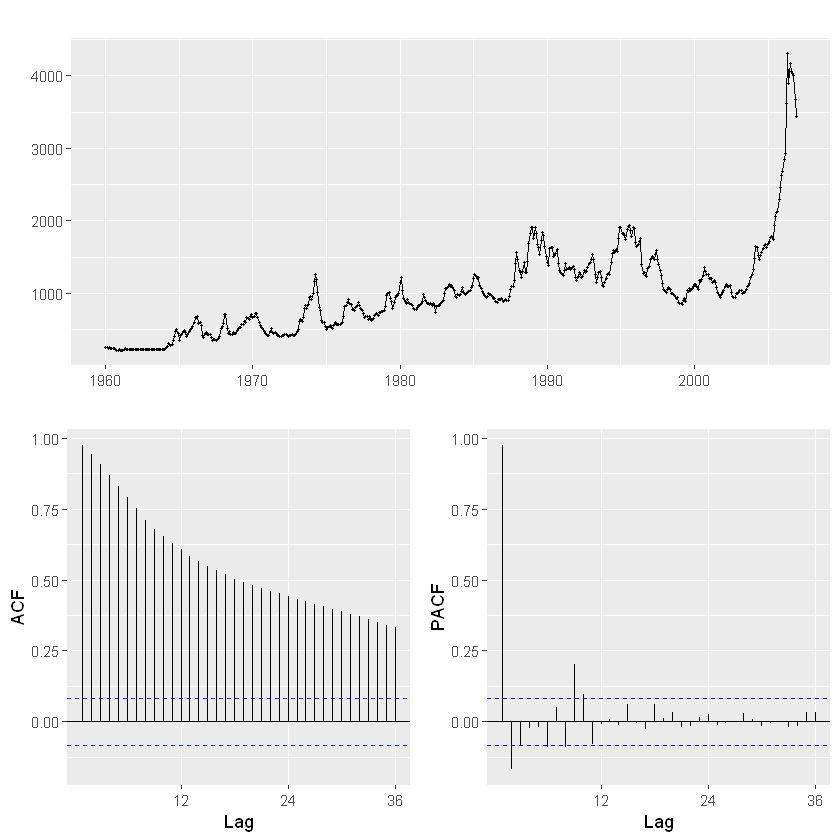

In [19]:
ggtsdisplay(mcopper)

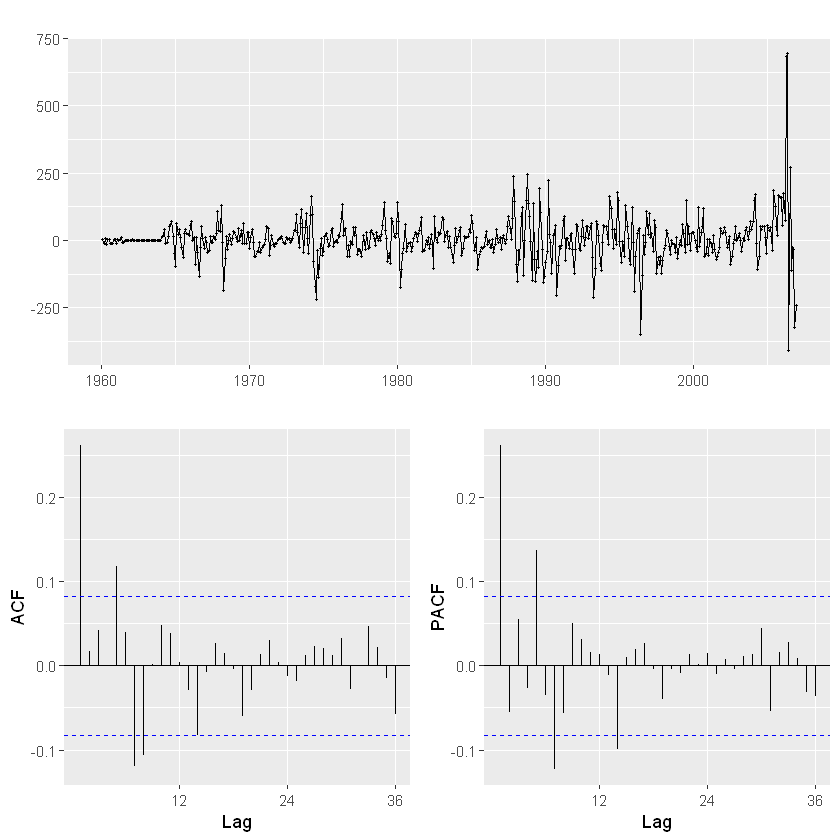

In [20]:
ggtsdisplay(diff(mcopper))

 minimum data value <= 0 so -min+0.25 added to all values


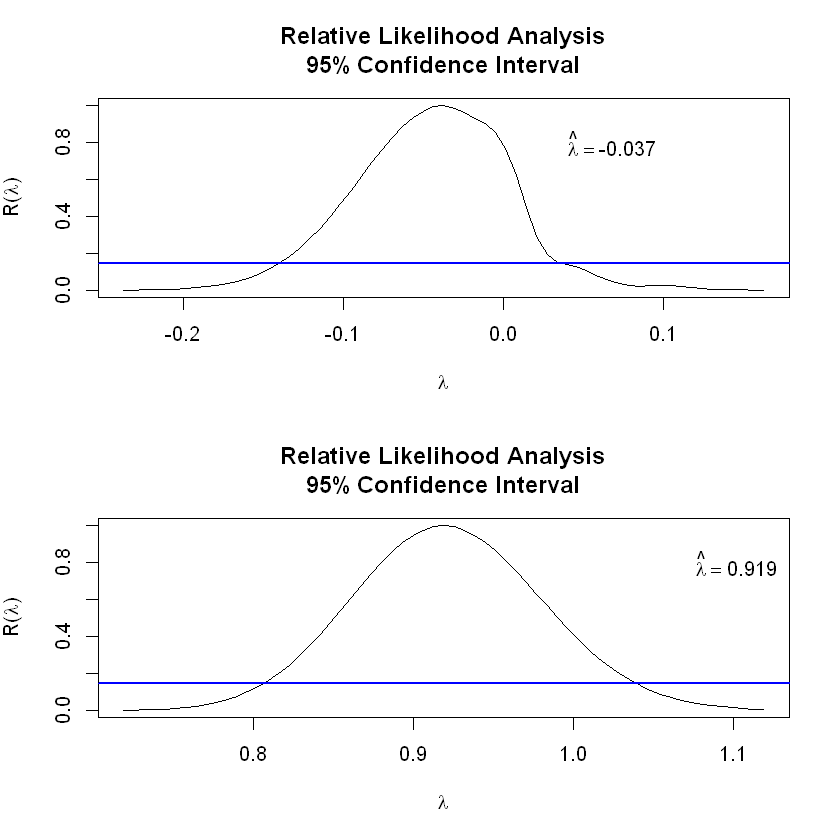

In [21]:
layout(mat=matrix(c(1,
                    2), nrow=2, byrow = TRUE))
BoxCox(mcopper)
BoxCox(diff(mcopper))

In [22]:
Box.test(fit3_1$residuals, type = "Ljung-Box",fitdf=0)
Box.test(fit3$residuals, type = "Ljung-Box",fitdf=0)


	Box-Ljung test

data:  fit3_1$residuals
X-squared = 38.98, df = 1, p-value = 4.281e-10



	Box-Ljung test

data:  fit3$residuals
X-squared = 0.017886, df = 1, p-value = 0.8936



	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)
Q* = 30.716, df = 23, p-value = 0.1299

Model df: 1.   Total lags used: 24



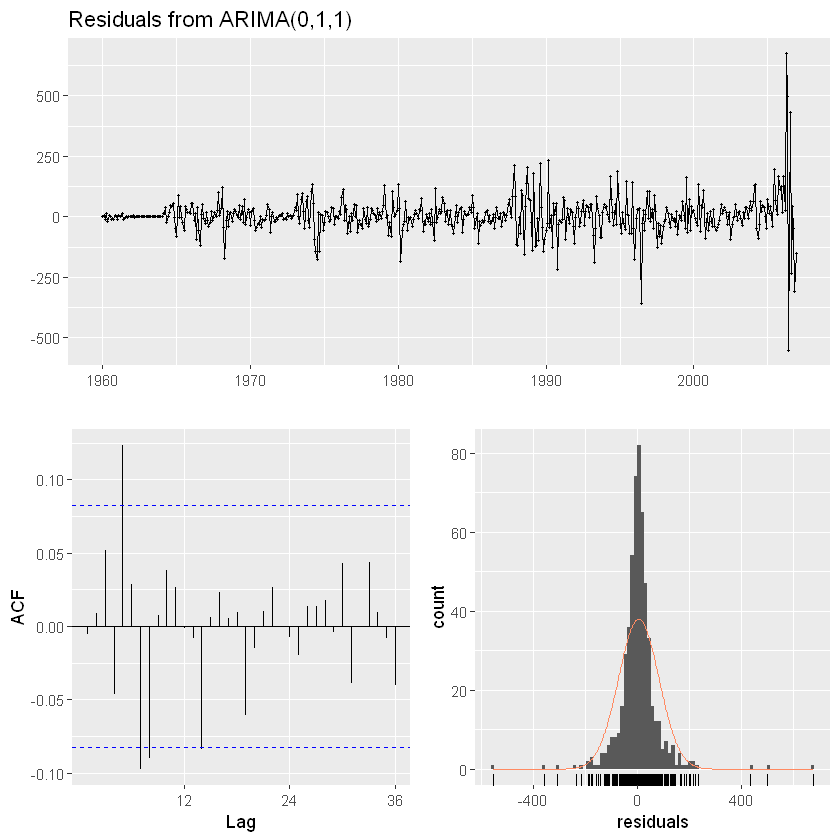

In [23]:
checkresiduals(fit3)

In [24]:
# 4.enplanements

fit4 <- auto.arima(enplanements)
fit4

Series: enplanements 
ARIMA(2,0,1)(0,1,1)[12] 

Coefficients:
         ar1      ar2      ma1     sma1
      1.3533  -0.3676  -0.7274  -0.4591
s.e.  0.1175   0.1115   0.0888   0.0969

sigma^2 estimated as 2.236:  log likelihood=-491.66
AIC=993.32   AICc=993.55   BIC=1011.31

In [25]:
print(round(head(decompose(enplanements)$seasonal,36), 2))

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1979 -4.50 -1.99  1.71  0.99  0.28  3.17  3.14  3.98 -2.59 -0.81 -1.49 -1.90
1980 -4.50 -1.99  1.71  0.99  0.28  3.17  3.14  3.98 -2.59 -0.81 -1.49 -1.90
1981 -4.50 -1.99  1.71  0.99  0.28  3.17  3.14  3.98 -2.59 -0.81 -1.49 -1.90


In [26]:
fit4_1 <- Arima(enplanements, seasonal = c(0, 1, 0))
fit4_1

Series: enplanements 
ARIMA(0,0,0)(0,1,0)[12] 

sigma^2 estimated as 6.76:  log likelihood=-641.11
AIC=1284.22   AICc=1284.23   BIC=1287.81

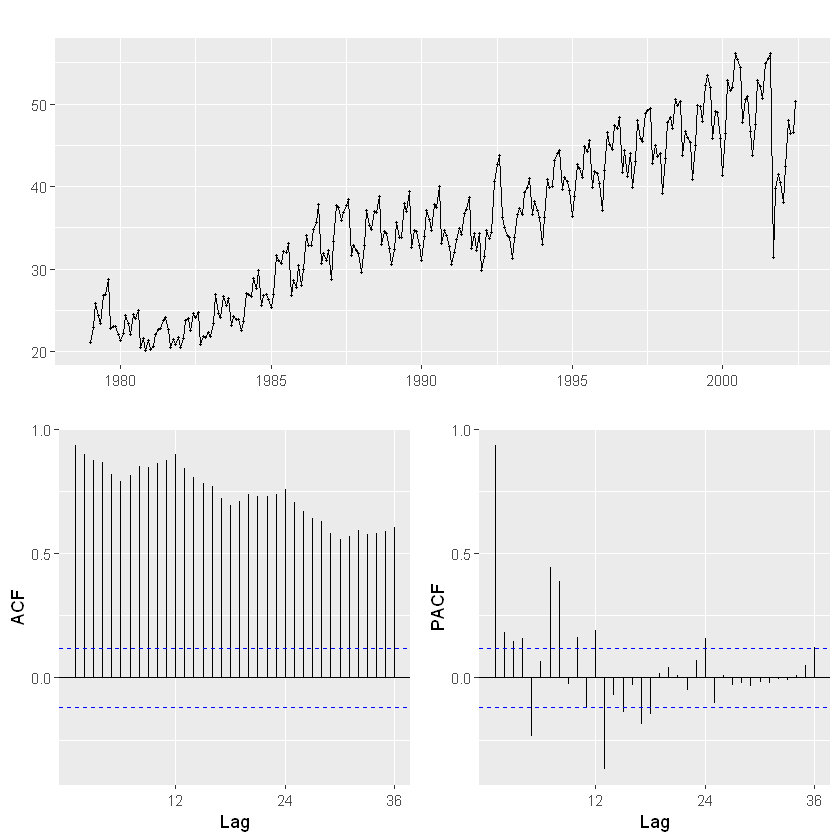

In [27]:
ggtsdisplay(enplanements)

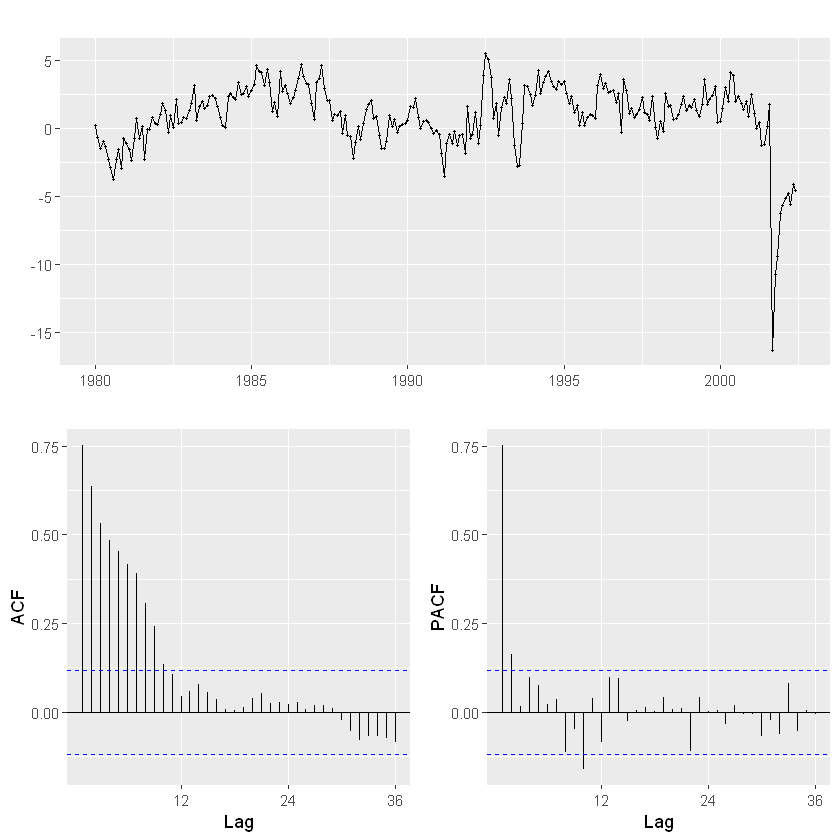

In [28]:
ggtsdisplay(diff(enplanements, lag = 12))

 minimum data value <= 0 so -min+0.25 added to all values


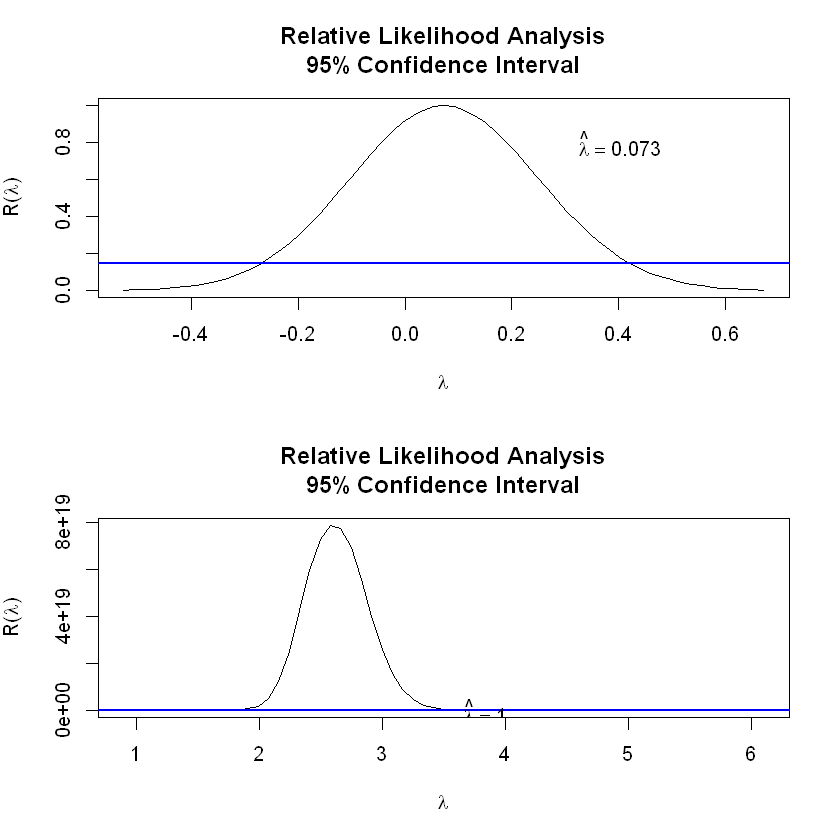

In [29]:
layout(mat=matrix(c(1,
                    2), nrow=2, byrow = TRUE))
BoxCox(enplanements)
BoxCox(diff(enplanements, lag = 12))

In [30]:
Box.test(fit4_1$residuals, type = "Ljung-Box")
Box.test(fit4$residuals, type = "Ljung-Box")


	Box-Ljung test

data:  fit4_1$residuals
X-squared = 162.07, df = 1, p-value < 2.2e-16



	Box-Ljung test

data:  fit4$residuals
X-squared = 0.016744, df = 1, p-value = 0.897



	Ljung-Box test

data:  Residuals from ARIMA(2,0,1)(0,1,1)[12]
Q* = 15.625, df = 20, p-value = 0.7396

Model df: 4.   Total lags used: 24



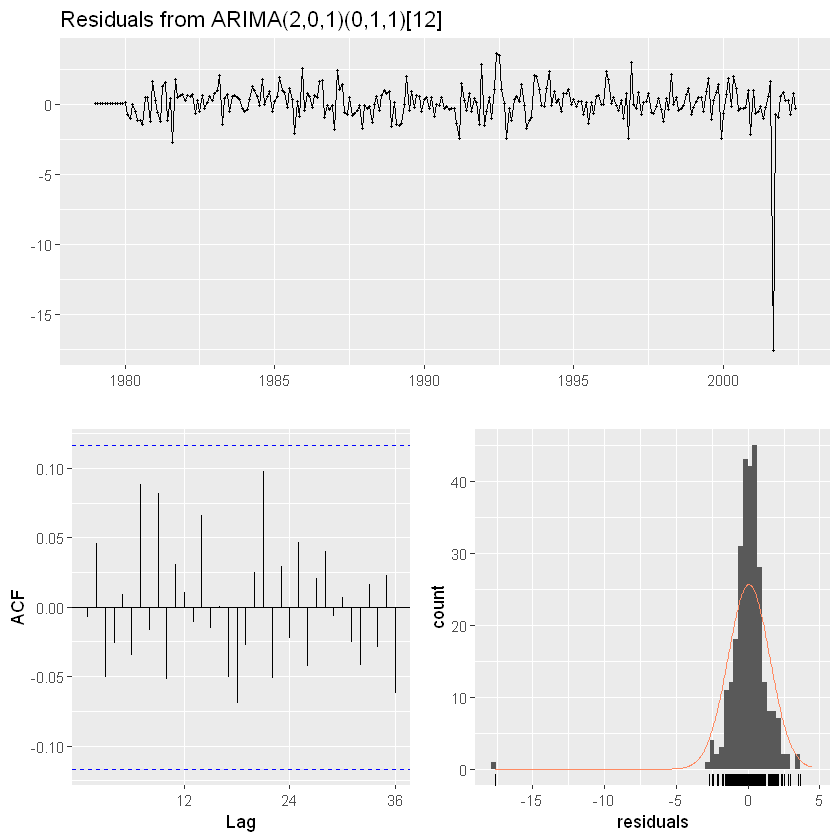

In [31]:
checkresiduals(fit4)

In [32]:
# 5.visitors

fit5 <- auto.arima(visitors)
fit5

Series: visitors 
ARIMA(1,0,1)(0,1,2)[12] with drift 

Coefficients:
         ar1      ma1     sma1    sma2   drift
      0.8968  -0.3187  -0.7110  0.1461  1.4820
s.e.  0.0379   0.0804   0.0753  0.0723  0.2667

sigma^2 estimated as 279.9:  log likelihood=-966.83
AIC=1945.66   AICc=1946.04   BIC=1966.24

In [33]:
print(round(head(decompose(visitors)$seasonal,36), 1))

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1985                         -58.2 -43.6  13.0 -18.7 -28.4   7.8  23.5  89.5
1986  -6.6  24.4  14.9 -17.5 -58.2 -43.6  13.0 -18.7 -28.4   7.8  23.5  89.5
1987  -6.6  24.4  14.9 -17.5 -58.2 -43.6  13.0 -18.7 -28.4   7.8  23.5  89.5
1988  -6.6  24.4  14.9 -17.5                                                


In [34]:
fit5_1 <- Arima(visitors, seasonal = c(0, 1, 0))
fit5_1

Series: visitors 
ARIMA(0,0,0)(0,1,0)[12] 

sigma^2 estimated as 1061:  log likelihood=-1117.73
AIC=2237.45   AICc=2237.47   BIC=2240.88

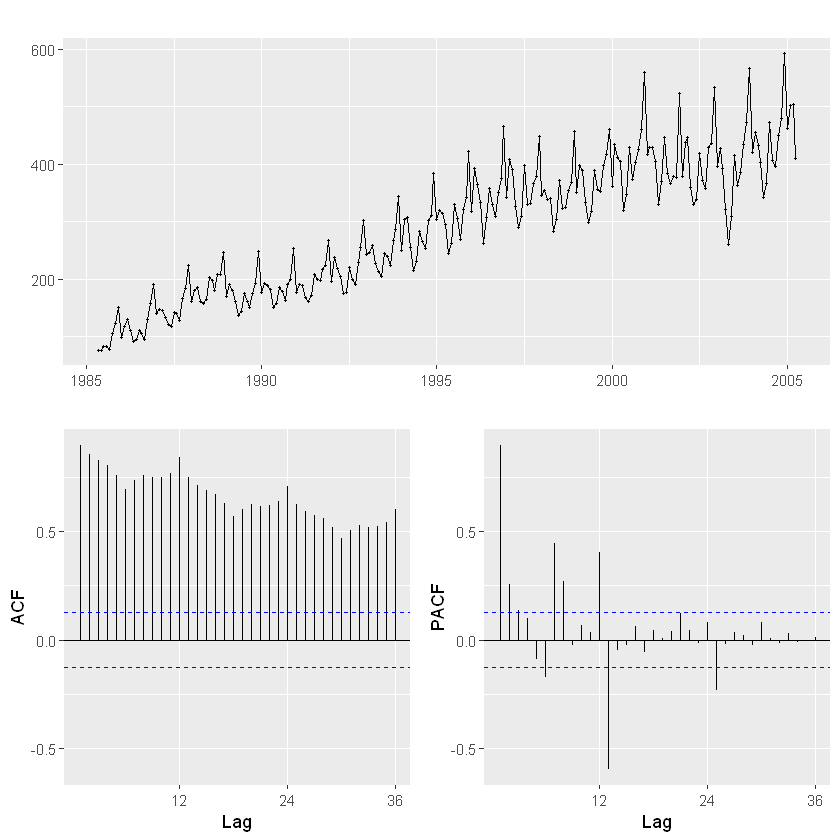

In [35]:
ggtsdisplay(visitors)

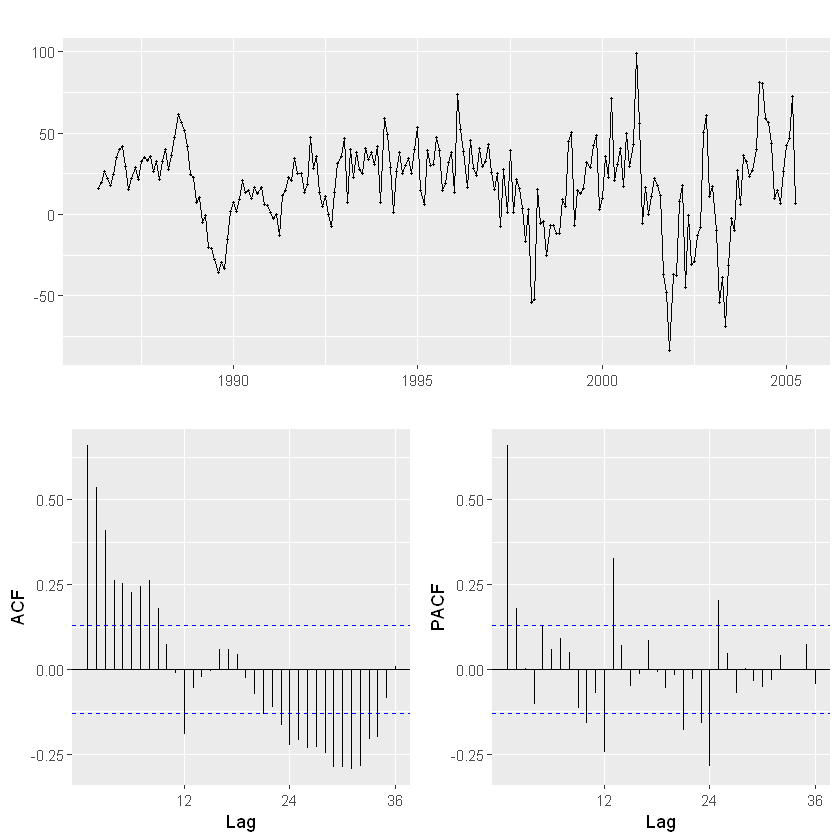

In [36]:
ggtsdisplay(diff(visitors, lag = 12))

 minimum data value <= 0 so -min+0.25 added to all values


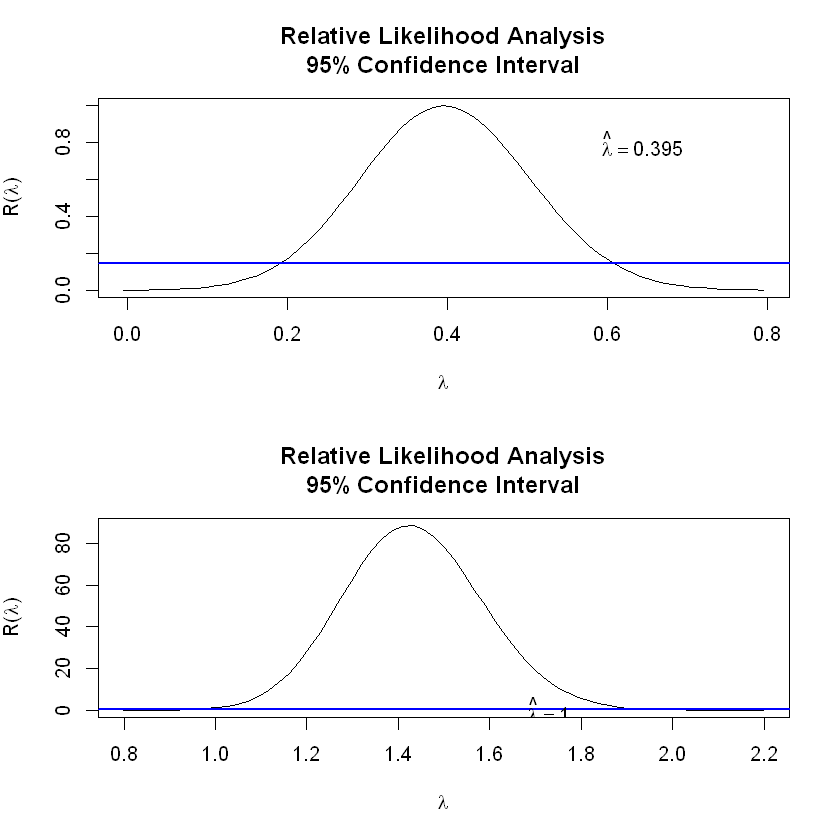

In [37]:
layout(mat=matrix(c(1,
                    2), nrow = 2, byrow = TRUE))
BoxCox(visitors)
BoxCox(diff(visitors, lag = 12))

In [38]:
Box.test(fit5_1$residuals, type = "Ljung-Box")
Box.test(fit5$residuals, type = "Ljung-Box")


	Box-Ljung test

data:  fit5_1$residuals
X-squared = 107.79, df = 1, p-value < 2.2e-16



	Box-Ljung test

data:  fit5$residuals
X-squared = 4.6399e-05, df = 1, p-value = 0.9946



	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(0,1,2)[12] with drift
Q* = 19.26, df = 19, p-value = 0.4403

Model df: 5.   Total lags used: 24



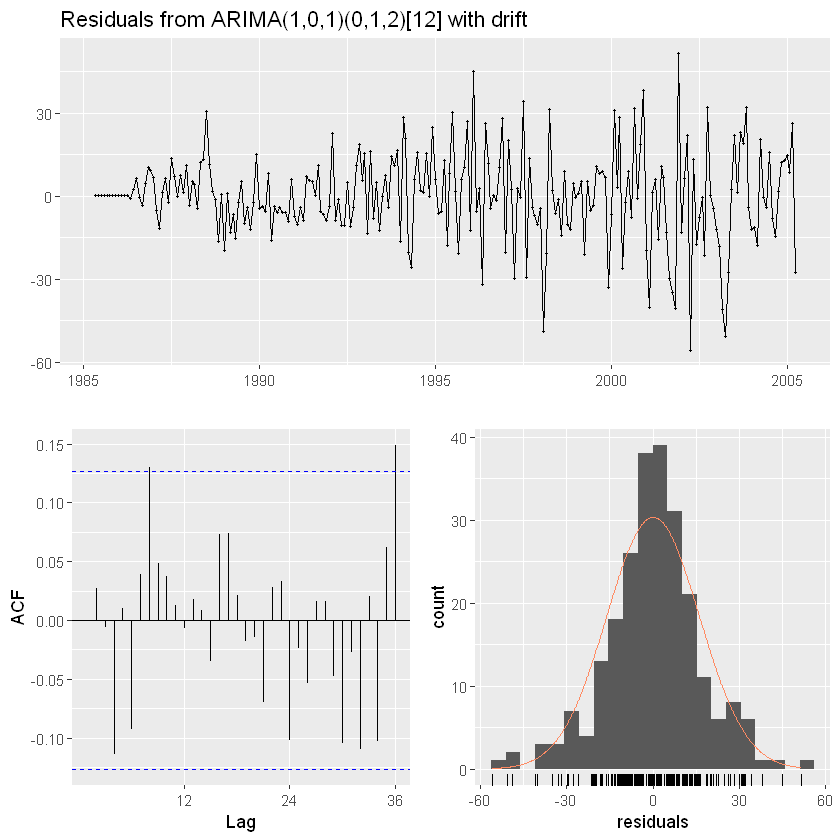

In [39]:
checkresiduals(fit5)

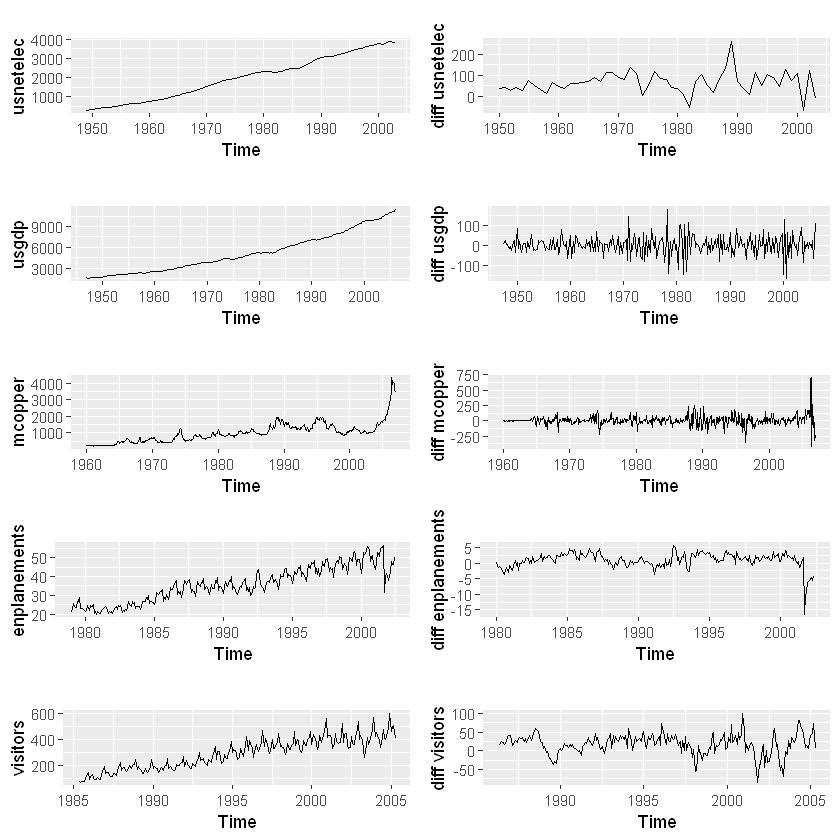

In [40]:
p1 <- autoplot(usnetelec) + ylab("usnetelec") ; p1d <- autoplot(diff(usnetelec)) + ylab("diff usnetelec")
p2 <- autoplot(usgdp) + ylab("usgdp") ; p2d <- autoplot(diff(diff(usgdp))) + ylab("diff usgdp")
p3 <- autoplot(mcopper) + ylab("mcopper") ; p3d <- autoplot(diff(mcopper)) + ylab("diff mcopper")
p4 <- autoplot(enplanements) + ylab("enplanements") ; p4d <- autoplot(diff(enplanements, lag = 12)) + ylab("diff enplanements")
p5 <- autoplot(visitors) + ylab("visitors") ; p5d <- autoplot(diff(visitors, lag = 12)) + ylab("diff visitors")

grid.arrange(p1, p1d, p2, p2d, p3, p3d, p4, p4d, p5, p5d,
    layout_matrix = rbind(
        c(1, 2),
        c(3, 4),
        c(5, 6),
        c(7, 8),
        c(9, 10)))